In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [7]:
# Read Data Files
cardio_dataset_raw = pd.read_csv("../input/cardio_train.csv",sep=";")

print("Dataset memiliki " + str(len(cardio_dataset_raw)) + " baris dan " + str(len(cardio_dataset_raw.columns)) + " kolom")
print()
print(cardio_dataset_raw.head())

Dataset memiliki 70000 baris dan 13 kolom

   id    age  gender  height  weight   ...    gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0   ...       1      0     0       1       0
1   1  20228       1     156    85.0   ...       1      0     0       1       1
2   2  18857       1     165    64.0   ...       1      0     0       0       1
3   3  17623       2     169    82.0   ...       1      0     0       1       1
4   4  17474       1     156    56.0   ...       1      0     0       0       0

[5 rows x 13 columns]


In [8]:
# Cek semua deskripsi label pada dataset
cardio_dataset_raw.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Cek semua label, lihat apakah terdapat NULL
cardio_dataset_raw.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

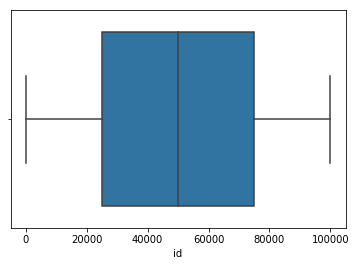

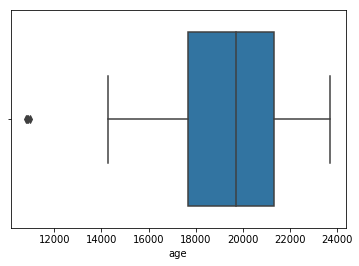

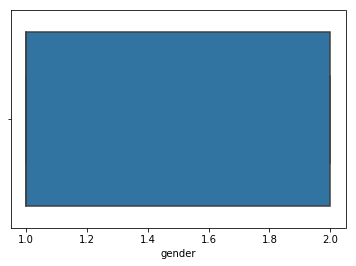

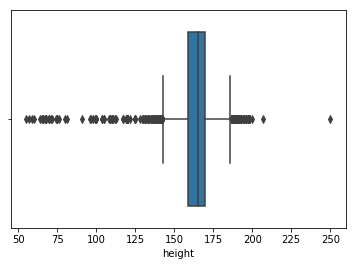

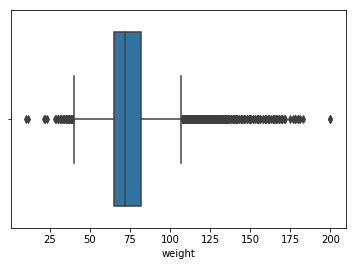

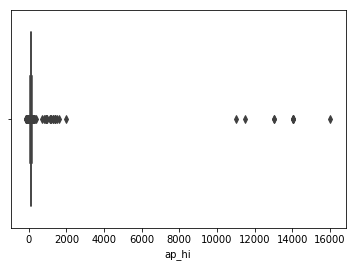

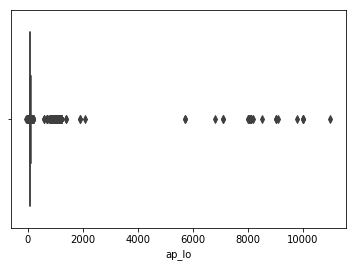

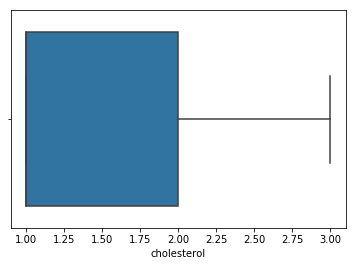

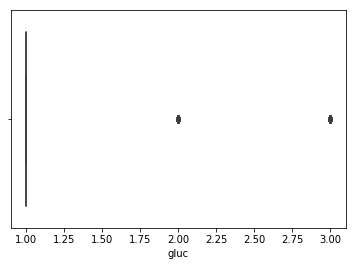

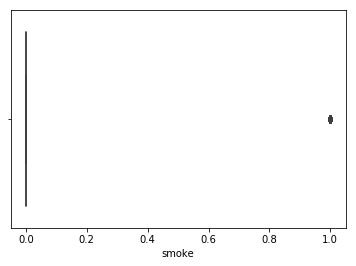

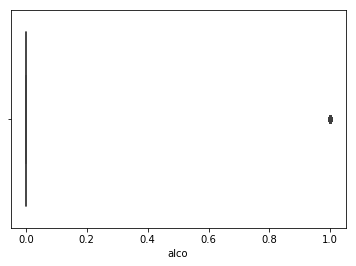

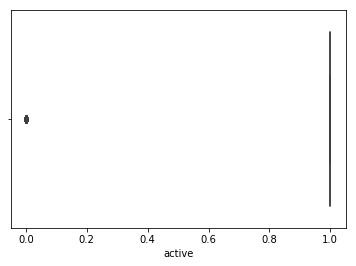

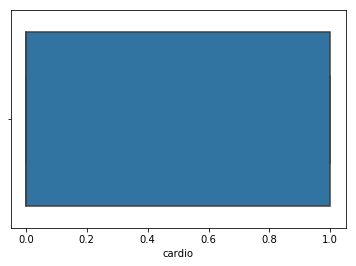

In [11]:
# Cek outlier menggunakan boxplot
import seaborn as sns
import matplotlib.pyplot as plt
for col in cardio_dataset_raw:
    sns.boxplot(x=cardio_dataset_raw[col])
    plt.show()

In [26]:
# Cek data outlier pada setiap label menggunakan IQR (InterQuartile Range)

copy_of_cardio_dataset_raw = cardio_dataset_raw.copy()

# # Menentukan label apa saja yang ingin dicek outliernya. Yang dicek hanyalah label yang bersifat numerical (bukan categorical maupun identifier)
# check_outlier_column = ['age','height','weight','ap_hi','ap_lo']

# row_with_outlier = []

# # Cek IQR pada semua label
Q1 = copy_of_cardio_dataset_raw.quantile(0.25)
Q3 = copy_of_cardio_dataset_raw.quantile(0.75)

IQR = Q3 - Q1
rangeBawah = (Q1 - 1.5 * IQR) // 1
rangeAtas = (Q3 + 1.5 * IQR) // 1

# for i in range(len(check_outlier_column)):
#     countOutlier = 0
#     for j in range(len(copy_of_cardio_dataset_raw)):
        
#         #Cek apakah data lebih kecil dari Q1 - 1.5 * IQR
#         if(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] < rangeBawah[check_outlier_column[i]]): 
#             countOutlier = countOutlier + 1
#             row_with_outlier.append(j)
        
#         #Cek apakah data lebih besar dari Q3 + 1.5 * IQR
#         elif(copy_of_cardio_dataset_raw.loc[j][check_outlier_column[i]] > rangeAtas[check_outlier_column[i]]):
#             countOutlier = countOutlier + 1
#             row_with_outlier.append(j)
            
#     print("Label " + check_outlier_column[i] + " memiliki " + str(countOutlier) + " data outlier")

print("Dataset's shape before cleansing the outlier", copy_of_cardio_dataset_raw.shape)
copy_of_cardio_dataset_raw = copy_of_cardio_dataset_raw[~((copy_of_cardio_dataset_raw < rangeBawah) | copy_of_cardio_dataset_raw > rangeAtas).any(axis=1)]
# copy_df.drop(copy_df[(copy_df['height'] > copy_df['height'].quantile(0.75)) | copy_df['height'] < copy_df['height'].quantile(0.25)].index, inplace=True)
# copy_df.drop(copy_df[(copy_df['weight'] > copy_df['weight'].quantile(0.75)) | copy_df['weight'] < copy_df['weight'].quantile(0.25)].index, inplace=True)
# copy_df.drop(copy_df[(copy_df['ap_hi'] > copy_df['ap_hi'].quantile(0.75)) | copy_df['ap_hi'] < copy_df['ap_hi'].quantile(0.25)].index, inplace=True)
# copy_df.drop(copy_df[(copy_df['ap_lo'] > copy_df['ap_lo'].quantile(0.75)) | copy_df['ap_lo'] < copy_df['ap_lo'].quantile(0.25)].index, inplace=True)
print("Dataset's shape after cleansing the outlier", copy_of_cardio_dataset_raw.shape)

Dataset's shape before cleansing the outlier (70000, 13)


NotImplementedError: couldn't find matching opcode for 'or_bbl'

In [13]:
#Logically, ap_hi (sistole) harus lebih tinggi dari ap_lo (diastole)
row_with_error = []

#Cek apakah ada tekanan darah yang error
for i in range(len(copy_of_cardio_dataset_raw)):
    if(copy_of_cardio_dataset_raw.loc[i]['ap_hi'] < copy_of_cardio_dataset_raw.loc[i]['ap_lo']):
        row_with_error.append(i)
    
print("Dataset memiliki " + str(len(row_with_error)) + " yang memiliki ap_lo yang lebih tinggi dari ap_hi")

Dataset memiliki 1234 yang memiliki ap_lo yang lebih tinggi dari ap_hi


In [ ]:
# Menggabungkan row_with_outlier dengan row_with_error
row_with_errors = []
row_with_errors = row_with_errors + row_with_outlier
row_with_errors = row_with_errors + row_with_error

# Cek row yang memiliki outlier & error, hapus row duplikasi, kemudian sort row dari terbesar ke terkecil
row_with_errors = list(dict.fromkeys(row_with_errors))

# Sort row dari terbesar ke terkecil
for i in range(len(row_with_errors)):
    swap = i + np.argmax(row_with_errors[i:])
    (row_with_errors[i], row_with_errors[swap]) = (row_with_errors[swap], row_with_errors[i])

#print(row_with_errors)
print("Secara total, terdapat " + str(len(row_with_errors)) + " baris yang harus dibersihkan")

In [ ]:
cleaned_cardio_dataset = copy_of_cardio_dataset_raw.copy().drop(row_with_errors, axis=0)

#Reset row index
cleaned_cardio_dataset = cleaned_cardio_dataset.reset_index()

print("Dataset yang baru memiliki " + str(len(cleaned_cardio_dataset)) + " baris dan " + str(len(cleaned_cardio_dataset.columns)) + " kolom")
print()
print(cleaned_cardio_dataset.head(5))


In [ ]:
#Label height dan weight dapat digabung, menghasilkan BMI (Body Mass Index)
bmi = []

# BMI List (for 18 years older, male and female):                      
# Underweight = <18.5            -> 0
# Normal      = 18.5 - 24.9      -> 1
# Overweight  = 25 - 29.9        -> 2
# Obesity     = >30              -> 3

def convert_bmi_to_list(list_bmi):
    for i in range(len(list_bmi)):
        if(list_bmi[i] < 18.5):
            list_bmi[i] = 0 #Underweight
        elif(list_bmi[i] >= 18.5 and list_bmi[i] < 25):
            list_bmi[i] = 1 #Normal
        elif(list_bmi[i] >= 25 and list_bmi[i] < 30):
            list_bmi[i] = 2 #Overweight
        elif(list_bmi[i] >= 30):
            list_bmi[i] = 3 #Obesity
    return list_bmi

for i in range(len(cleaned_cardio_dataset)):
    bmi.append(cleaned_cardio_dataset.loc[i]['weight'] / (cleaned_cardio_dataset.loc[i]['height'] / 100) ** 2)
            
convert_bmi_to_list(bmi)

#print(bmi)

#Tambah kolom baru, yaitu bmi yang merupakan gabungan dari kolom weight dan kolom height
cleaned_cardio_dataset['bmi'] = bmi

print(cleaned_cardio_dataset.head(5))

In [ ]:
#Label ap_hi dan ap_lo dapat digabung, menghasilkan blood pressure
bp = []

# Blood Pressure List: (based on bloodpressureUK)
# ap_hi < 90 or ap_lo < 60 : Low Blood Pressure                       -> 0
# ap_hi >= 90 and ap_hi < 140 and ap_lo >= 60 and ap_lo < 90 : Normal -> 1
# ap_hi >= 140 or ap_lo >= 90 : High Blood Pressure                   -> 2

for i in range(len(cleaned_cardio_dataset)):
    if(cleaned_cardio_dataset.loc[i]['ap_hi'] < 90 or cleaned_cardio_dataset.loc[i]['ap_lo'] < 60):
        bp.append(0) #Low BP
    elif(cleaned_cardio_dataset.loc[i]['ap_hi'] >= 90 and cleaned_cardio_dataset.loc[i]['ap_hi'] < 140 and cleaned_cardio_dataset.loc[i]['ap_lo'] >= 60 and cleaned_cardio_dataset.loc[i]['ap_lo'] < 90):
        bp.append(1) #Normal BP
    elif(cleaned_cardio_dataset.loc[i]['ap_hi'] >= 140 and cleaned_cardio_dataset.loc[i]['ap_lo'] >= 90):
        bp.append(2) #High BP
    else:
        bp.append(-1) #Error
        
cleaned_cardio_dataset['bp'] = bp

print(cleaned_cardio_dataset.head(5))

In [ ]:
#Cek apakah terdapat bp yang error
row_with_bp_error = []

for i in range(len(cleaned_cardio_dataset)):
    if(cleaned_cardio_dataset.loc[i]['bp'] == -1):
        row_with_bp_error.append(i)
        
print("Terdapat " + str(len(row_with_bp_error)) + " baris yang memiliki bp error")

In [ ]:
# Cek row yang memiliki bp error, hapus row duplikasi, kemudian sort row dari terbesar ke terkecil
row_with_bp_error = list(dict.fromkeys(row_with_bp_error))

# Sort row dari terbesar ke terkecil
for i in range(len(row_with_bp_error)):
    swap = i + np.argmax(row_with_bp_error[i:])
    (row_with_bp_error[i], row_with_bp_error[swap]) = (row_with_bp_error[swap], row_with_bp_error[i])

#print(row_with_bp_error)

In [ ]:
cleaned_cardio_dataset = cleaned_cardio_dataset.drop(row_with_bp_error, axis=0)

#Reset row index
cleaned_cardio_dataset = cleaned_cardio_dataset.reset_index()

print("Dataset yang baru memiliki " + str(len(cleaned_cardio_dataset)) + " baris dan " + str(len(cleaned_cardio_dataset.columns)) + " kolom")
print()
print(cleaned_cardio_dataset.head(5))

Pearson’s Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 to +1.

1 means that they are highly correlated and 0 means no correlation. -1 means that there is a negative correlation. Think of it as an inverse proportion.

https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/

In [ ]:
sns.heatmap(cleaned_cardio_dataset.corr(),annot=True,cmap='YlGnBu')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show

Kami akan mengambil cardio sebagai label, dan menentukan fitur berdasarkan plotting correlation dengan metode Pearson di atas. Dari plotting tersebut, kami memutuskan untuk memilih age, weight, ap_hi, ap_lo, dan chole

In [ ]:
final_cardio = cleaned_cardio_dataset.copy().drop(columns=['level_0','index','id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo'])
final_cardio.head(5)

In [ ]:
final_cardio.describe()

In [ ]:
y_cardio = final_cardio['cardio']
x_cardio = final_cardio.drop('cardio', axis=1)

In [ ]:
y_cardio.head(5)

In [ ]:
x_cardio.head(5)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_cardio, y_cardio, test_size=0.3)

In [ ]:
print("Data training {}, data testing {}".format(x_train.shape, x_test.shape))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
for col in x_train.columns:
    x_train[col] = scaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
x_train.head()

In [ ]:
for col in x_train.columns:
    x_test[col] = scaler.fit_transform(np.array(x_test[col]).reshape(-1,1))
x_test.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion="entropy", random_state=2, warm_start=True)
rfc.fit(x_train, y_train)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(tol=1e-16)
gbc.fit(x_train, y_train)

In [ ]:
print("Random Forest Classifier - Accuracy: ", rfc.score(x_test, y_test))
print("Ada Boost Classifier - Accuracy: ", abc.score(x_test, y_test))
print("Gradient Boosting Classifier - Accuracy: ", gbc.score(x_test, y_test))

Benchmarking for the Accuracies

In [ ]:
np.unique(y_test)

In [ ]:
((y_train == 0).sum() + (y_test == 0).sum()) / final_cardio.shape[0]

In [ ]:
((y_train == 1).sum() + (y_test == 1).sum()) / final_cardio.shape[0]

## Test 2

In [ ]:
cleaned_cardio_df = cleaned_cardio_dataset.copy().drop(columns=["level_0", "index", "id", "ap_hi", "ap_lo", "weight", "height"])
cleaned_cardio_df.head()

In [ ]:
cleaned_cardio_df.describe()

In [ ]:
sns.heatmap(cleaned_cardio_df.corr(),annot=True,cmap='YlGnBu',square=True)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show

In [ ]:
y_coba = cleaned_cardio_df["cardio"]
x_coba = cleaned_cardio_df.drop(columns=["cardio"])

In [ ]:
x_coba.head()

In [ ]:
y_coba.head()

In [ ]:
x_train_coba, x_test_coba, y_train_coba, y_test_coba = train_test_split(x_coba, y_coba, test_size=0.3, random_state=1)

In [ ]:
print(x_train_coba.shape)
print(x_test_coba.shape)